<a href="https://colab.research.google.com/github/MateoJaksic/Analiza-populacijskih-podataka/blob/main/analizapopulacijskihpodataka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analiza populacijskih podataka

Projekt se bavi analizom populacijskih podataka država u Europi. Analizira se broj stanovnika u razdoblju od 2012. do 2023. godine te se radi predikcija za naredne godine.

Podaci su preuzeti s [Eurostata](https://ec.europa.eu/eurostat/databrowser/view/tps00001/default/table?lang=en&category=t_demo.t_demo_pop).

In [469]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from sklearn.linear_model import LinearRegression

Dohvaćanje podataka.

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/MateoJaksic/Analiza-populacijskih-podataka/main/podaci.csv?token=GHSAT0AAAAAACIKYZDS2IJVV2V4P6WFQAX4ZN5FX4A', delimiter=",")

df = df.rename(columns={'geo': 'country_code'})
df = df.rename(columns={'TIME_PERIOD': 'year'})
df = df.rename(columns={'OBS_VALUE': 'population'})

In [53]:
df_code = pd.read_csv('https://raw.githubusercontent.com/MateoJaksic/Analiza-populacijskih-podataka/main/drzave.csv?token=GHSAT0AAAAAACIKYZDTJBYSL3KRZJ44RTT2ZN5FK6Q', delimiter=",")

Za početak ćemo izračunati populaciju Europske Unije (EU) za 2023. godinu. To ćemo postići zbrajanjem populacija 27 država članica EU.

Prvo dohvaćamo listu država koje su članice EU.

In [74]:
clanice_eu = list(df_code[df_code['eu'] == '+'].country_code)

Kreiramo funkciju koja provjerava jesu li podaci u pravom formatu.

Nakon toga dohvaćamo podatke o njihovoj populaciji za 2023. godinu.

In [242]:
populacija = {}
eu_populacija = 0

for drzava in clanice_eu:
  eu_populacija += int(df[(df['country_code'] == drzava) & (df['year'] == 2023)].population)
  populacija[drzava] = round(float(int(df[(df['country_code'] == drzava) & (df['year'] == 2023)].population) / 1000000), 2)

eu_populacija = round(float(eu_populacija / 1000000), 2)

Izračunamo udio populacije države u populaciji EU za 2023. godinu.

In [243]:
udio_populacije_eu = {}
for drzava in clanice_eu:
  udio_populacije_eu[drzava] = str(round(float(populacija[drzava] / eu_populacija) * 100, 2)) + "%"

Tablični prikaz podataka o populaciji za članice EU u 2023. godini u milijunima. Tablica sadrži populaciju države i udio populacije te države u populaciji EU.

In [246]:
podaci = {
    'drzava': list(df_code[df_code['eu'] == '+'].country),
    'populacija': list(populacija.values()),
    'udio': list(udio_populacije_eu.values())
}

df_populacija = pd.DataFrame(podaci)
df_populacija = df_populacija.set_index('drzava')
df_populacija = tabulate(df_populacija, headers=['Država', "Populacija", "Udio"], tablefmt='fancy_grid')
print(df_populacija)

╒═════════════╤══════════════╤════════╕
│ Država      │   Populacija │ Udio   │
╞═════════════╪══════════════╪════════╡
│ Austria     │         9.1  │ 2.03%  │
├─────────────┼──────────────┼────────┤
│ Belgium     │        11.75 │ 2.62%  │
├─────────────┼──────────────┼────────┤
│ Bulgaria    │         6.45 │ 1.44%  │
├─────────────┼──────────────┼────────┤
│ Cyprus      │         0.92 │ 0.21%  │
├─────────────┼──────────────┼────────┤
│ Czechia     │        10.83 │ 2.42%  │
├─────────────┼──────────────┼────────┤
│ Germany     │        84.36 │ 18.81% │
├─────────────┼──────────────┼────────┤
│ Denmark     │         5.93 │ 1.32%  │
├─────────────┼──────────────┼────────┤
│ Estonia     │         1.37 │ 0.31%  │
├─────────────┼──────────────┼────────┤
│ Greece      │        10.39 │ 2.32%  │
├─────────────┼──────────────┼────────┤
│ Spain       │        48.06 │ 10.72% │
├─────────────┼──────────────┼────────┤
│ Finland     │         5.56 │ 1.24%  │
├─────────────┼──────────────┼────────┤


Tablični prikaz podatka o populaciji EU u 2023. godini u milijunima.

In [149]:
podaci = [[eu_populacija]]

eu_populacija_tablica = tabulate(podaci, headers=['Europska unija'], tablefmt='fancy_grid')
print(eu_populacija_tablica)

╒══════════════════╕
│   Europska unija │
╞══════════════════╡
│           448.39 │
╘══════════════════╛


Kreiramo funkciju koja će raditi ispis podataka o populaciji za pojedini državu.

In [507]:
def prikaz_podataka_za_drzavu(country_code):
  godine_drzava = list(df[df['country_code'] == country_code].year)
  populacija_drzava = list(round((df[df['country_code'] == country_code].population)/1000000, 2))

  podaci = {
      'godina': godine_drzava,
      'populacija': populacija_drzava
  }

  graf_populacija_drzava_x = podaci['godina']
  graf_populacija_drzava_y = podaci['populacija']

  drzava = list(df_code[df_code['country_code'] == country_code].country)

  plt.figure(1, [15, 5])
  plt.plot(graf_populacija_drzava_x, graf_populacija_drzava_y, color='blue')
  plt.grid(True, alpha=0.5)
  plt.xlabel('Godina')
  plt.ylabel('Populacija (u milijunima)')
  plt.title(f'{drzava[0]} - Populacija (2012. - 2023.)')
  plt.show()

Prikaz podataka populacije od 2012. do 2023. godine za Hrvatsku u milijunima.

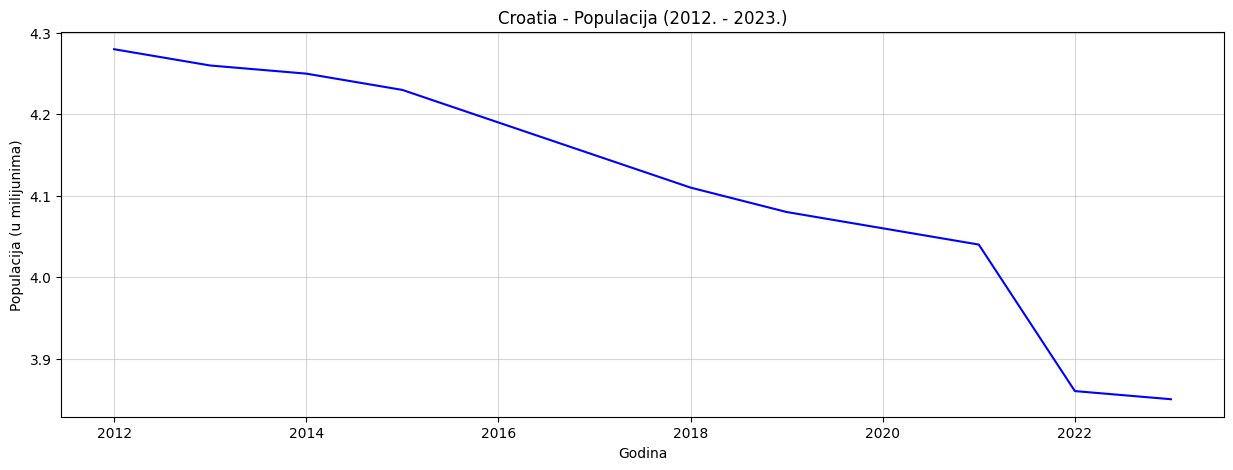

In [508]:
prikaz_podataka_za_drzavu('HR')

Prikaz podataka populacije od 2012. do 2023. godine za Njemačku u milijunima.

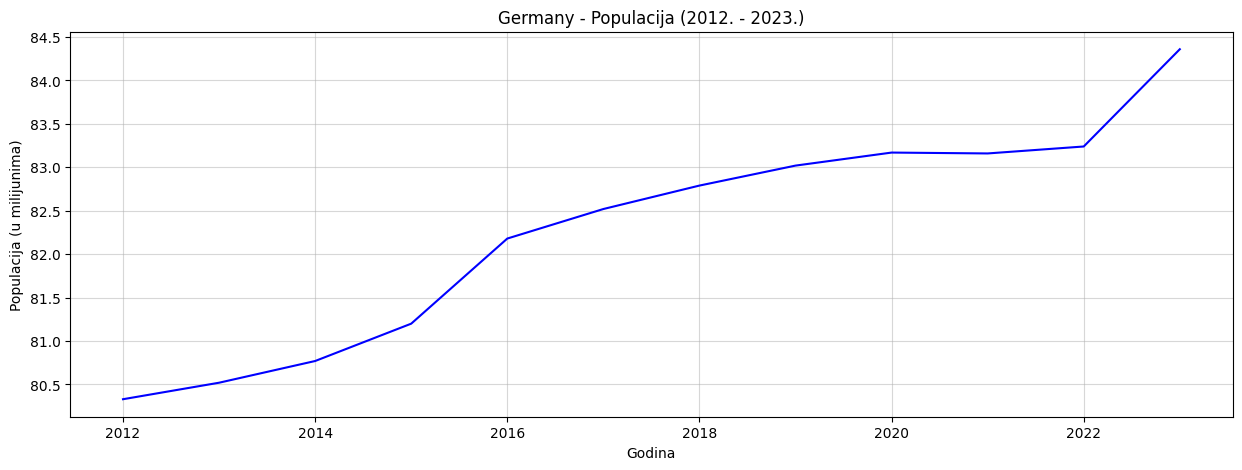

In [509]:
prikaz_podataka_za_drzavu('DE')

Prikaz podataka populacije od 2012. do 2023. godine za Irsku u milijunima.

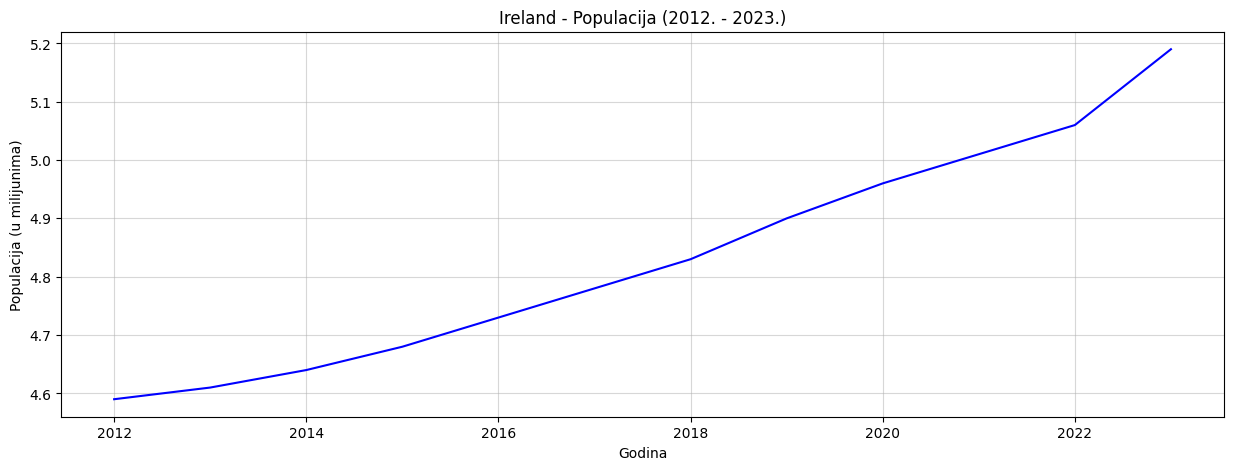

In [510]:
prikaz_podataka_za_drzavu('IE')

Prikaz podataka populacije od 2012. do 2023. godine za Latviju u milijunima.

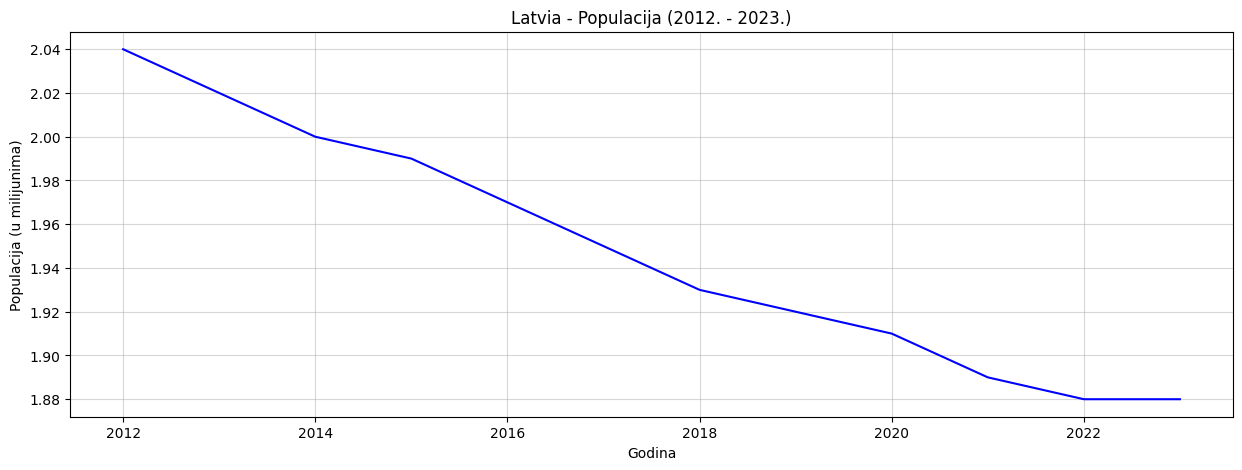

In [511]:
prikaz_podataka_za_drzavu('LV')

Kreiranje funkcije za prikaz država na grafu.

In [326]:
def graf_za_drzavu(country_code, boja):
  godine_drzava = list(df[df['country_code'] == country_code].year)
  populacija_drzava = list(round((df[df['country_code'] == country_code].population)/1000000, 2))

  podaci = {
      'godina': godine_drzava,
      'populacija': populacija_drzava
  }

  graf_populacija_drzava_x = podaci['godina']
  graf_populacija_drzava_y = podaci['populacija']

  drzava = list(df_code[df_code['country_code'] == country_code].country)

  plt.figure(1, [15, 5])
  return plt.plot(graf_populacija_drzava_x, graf_populacija_drzava_y, color=boja, label=drzava[0], linewidth=2.5)

Prikaz grafa s najmnogoljudnijim državama EU u razdoblju između 2012. i 2023. godine u milijunima.

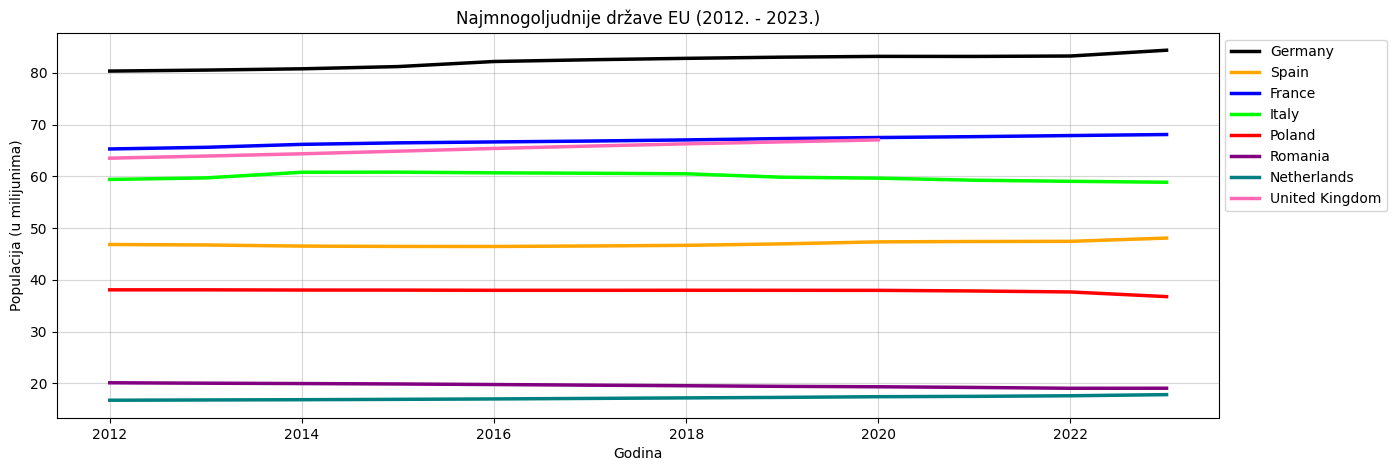

In [521]:
odabrane_drzave = ['DE', "ES", "FR", "IT", "PL", "RO", "NL", "UK"]
boje = ['black', 'orange', 'blue', 'lime', 'red', 'purple', 'teal', "hotpink"]

for drzava, boja in zip(odabrane_drzave, boje):
  plot_drzava = graf_za_drzavu(drzava, boja)
  plot_drzava

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True, alpha=0.5)
plt.xlabel('Godina')
plt.ylabel('Populacija (u milijunima)')
plt.title('Najmnogoljudnije države EU (2012. - 2023.)')
plt.show()

Prikaz podataka populacije od 2012. do 2023. godine za EU u milijunima.

In [359]:
eu_populacija = {}
eu_populacija_brexit = {}

for godina in range(2012, 2024):
  eu_populacija[godina] = 0
  eu_populacija_brexit[godina] = 0

for godina in range(2012, 2024):
  for drzava in clanice_eu:
    eu_populacija[godina] += round((int(df[(df['country_code'] == drzava) & (df['year'] == godina)].population) / 1000000), 2)
    eu_populacija_brexit[godina] += round((int(df[(df['country_code'] == drzava) & (df['year'] == godina)].population) / 1000000), 2)
  if godina <= 2020:
    eu_populacija[godina] += round((int(df[(df['country_code'] == 'UK') & (df['year'] == godina)].population) / 1000000), 2)

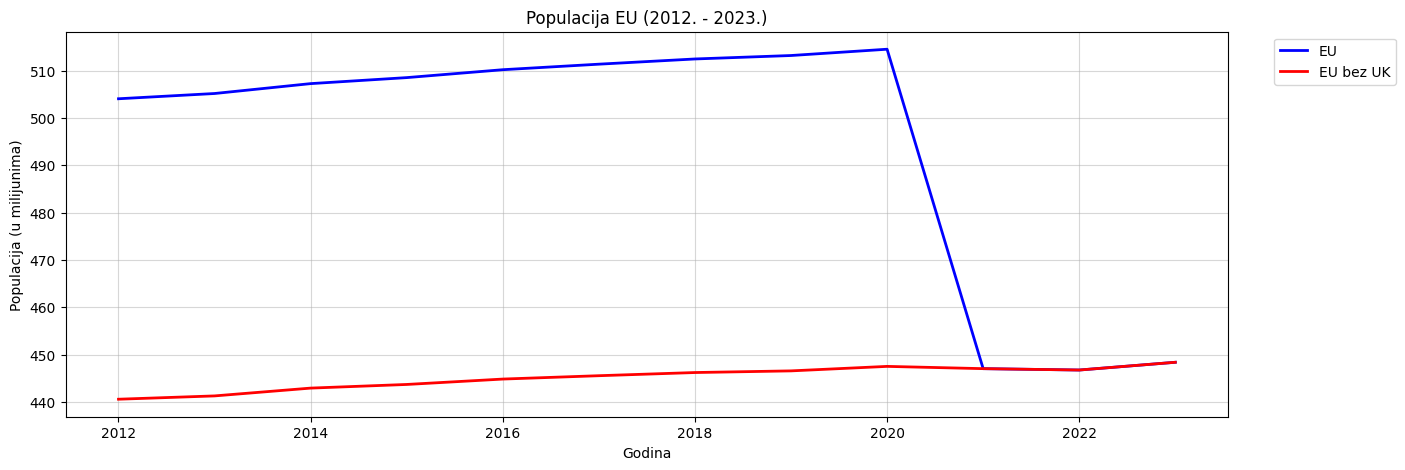

In [363]:
podaci = {
  'godina': list(range(2012, 2024)),
  'populacija': eu_populacija.values(),
  'populacija_brexit': eu_populacija_brexit.values()
}

graf_populacija_eu_x = podaci['godina']
graf_populacija_eu_y = podaci['populacija']
graf_populacija_eu_brexit_y = podaci['populacija_brexit']

plt.figure(1, [15, 5])
plt.grid(True, alpha=0.5)
plt.xlabel('Godina')
plt.ylabel('Populacija (u milijunima)')
plt.title('Populacija EU (2012. - 2023.)')
plt.plot(graf_populacija_eu_x, graf_populacija_eu_y, color="blue", label="EU", linewidth=2)
plt.plot(graf_populacija_eu_x, graf_populacija_eu_brexit_y, color="red", label="EU bez UK", linewidth=2)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

Razlog za nagli pad u populaciji je izlazak Ujedinjenog Kraljestva iz EU u 2020. godini. Od 2021. do 2023. godine preklapaju se plava i crvena linija.

Kreiranje funkcije za previđanje broja stanovnika u razdoblju do 2024. do 2050. godine u milijunima.

In [487]:
def predikcija_drzava(country_code):
  godine = np.arange(2012, 2024)
  populacija_drzave = np.array(round((df[df['country_code'] == country_code].population)/1000000, 2))

  godine = godine.reshape(-1, 1)

  model = LinearRegression()
  model.fit(godine, populacija_drzave)

  godine_za_predvidanje = np.arange(2024, 2051).reshape(-1, 1)
  predikcije = model.predict(godine_za_predvidanje)

  populacija_s_pretpostavljenim = []
  for populacija in populacija_drzave:
    populacija_s_pretpostavljenim.append(populacija)
  for populacija in predikcije:
    populacija_s_pretpostavljenim.append(populacija)
  godine_s_pretpostavljenim = np.arange(2012, 2051)

  drzava = list(df_code[df_code['country_code'] == country_code].country)

  plt.figure(1, [15, 5])
  plt.plot(godine_s_pretpostavljenim, populacija_s_pretpostavljenim)
  plt.grid(True, alpha=0.5)
  plt.xlabel('Godine')
  plt.ylabel('Populacija (u milijunima)')
  plt.title(f'{drzava[0]} - Pretpostavka populacije za razdoblje između 2024. i 2050. godine')
  plt.show()

Prikaz podataka predikcije populacije za Hrvatsku za razdoblje od 2024. do 2050. godine u milijunima.

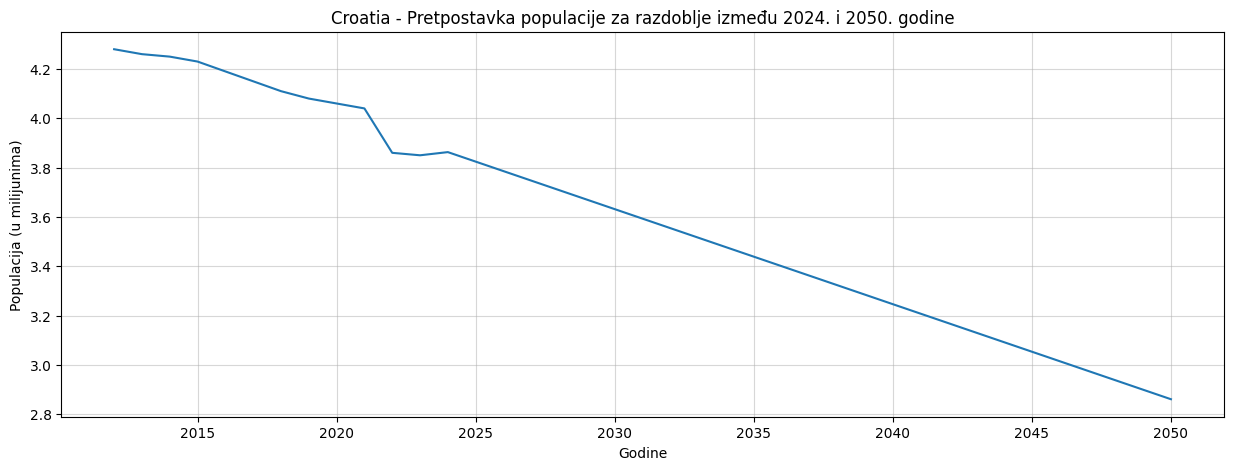

In [488]:
predikcija_drzava('HR')

Prikaz podataka predikcije populacije za Luksemburg za razdoblje od 2024. do 2050. godine u milijunima.

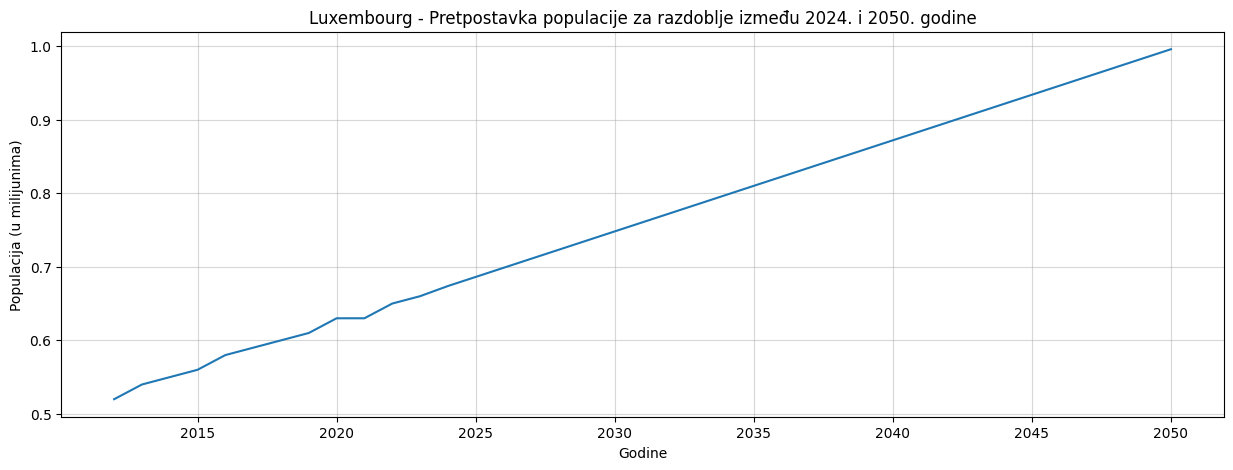

In [490]:
predikcija_drzava('LU')

Prikaz podataka predikcije populacije za Španjolsku za razdoblje od 2024. do 2050. godine u milijunima.

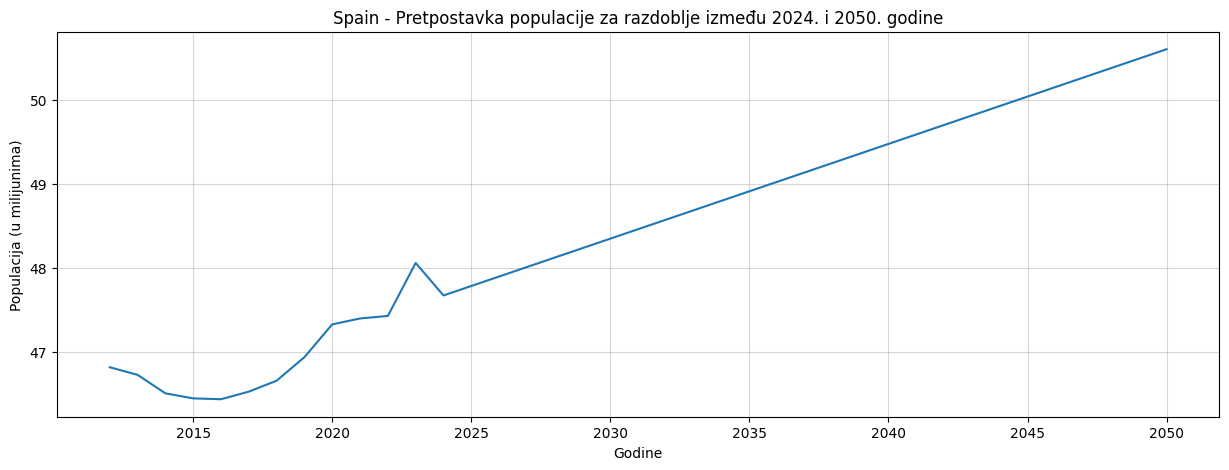

In [491]:
predikcija_drzava('ES')

Prikaz podataka predikcije populacije za Bugarsku za razdoblje od 2024. do 2050. godine u milijunima.

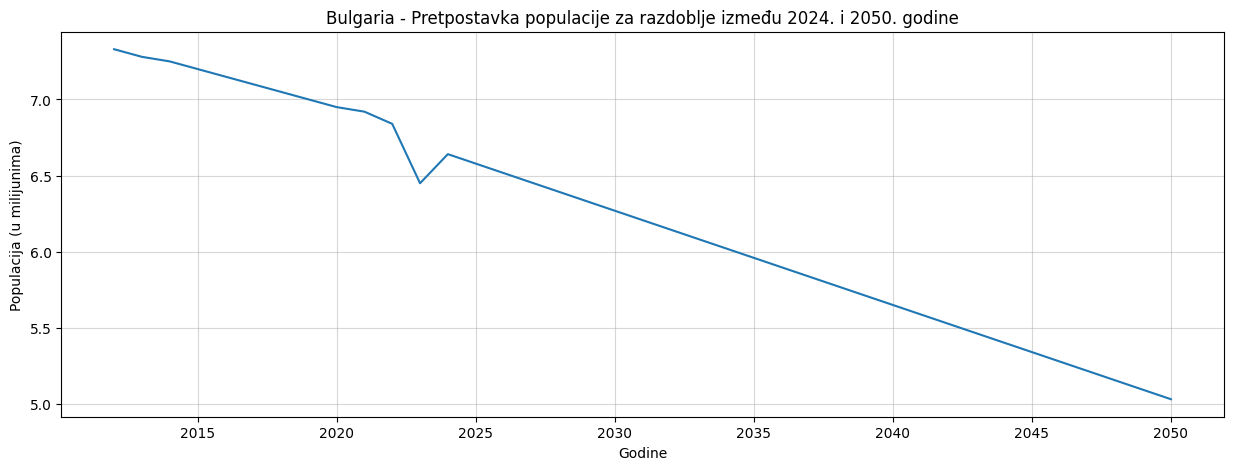

In [493]:
predikcija_drzava('BG')

Prikaz podataka predikcije populacije za Maltu za razdoblje od 2024. do 2050. godine u milijunima.

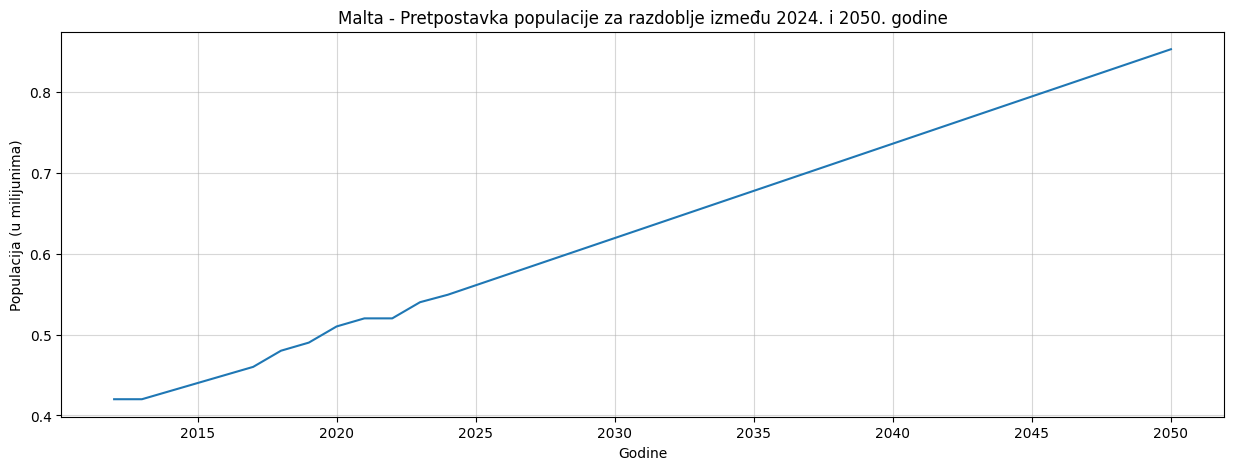

In [494]:
predikcija_drzava('MT')

Prikaz podataka predikcije populacije za Poljsku za razdoblje od 2024. do 2050. godine u milijunima.

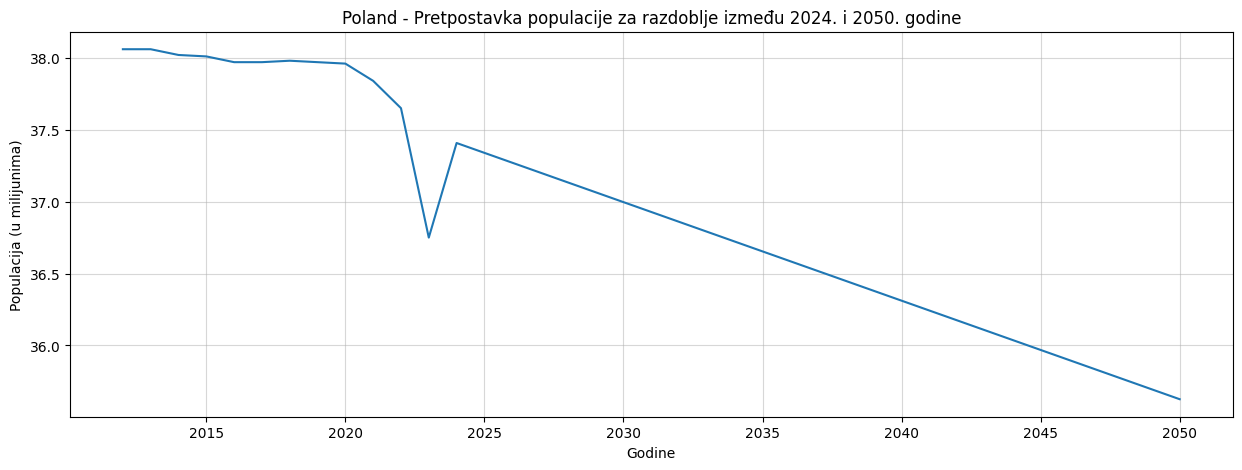

In [495]:
predikcija_drzava('PL')

Prikaz podataka predikcije populacije za Poljsku za razdoblje od 2024. do 2050. godine u milijunima.

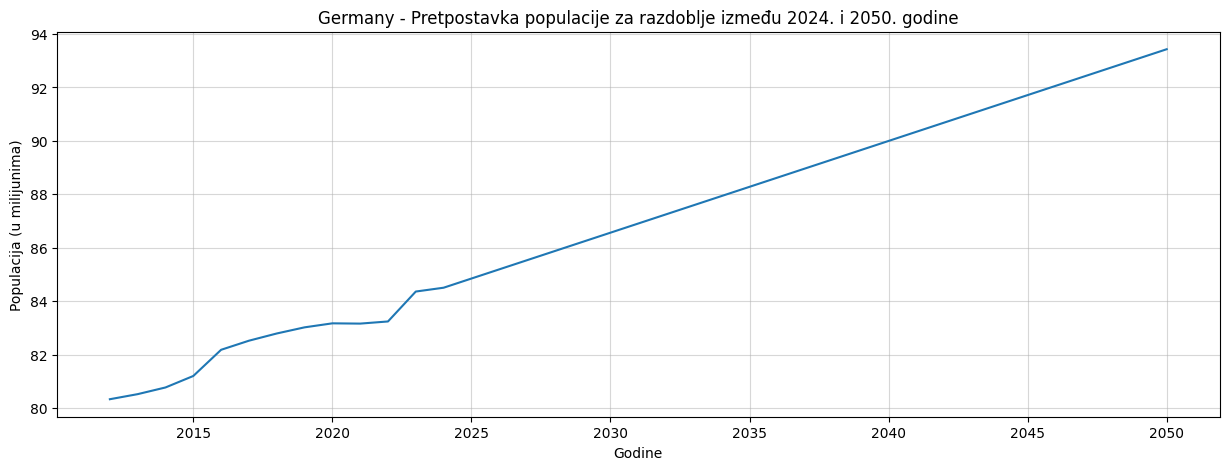

In [506]:
predikcija_drzava('DE')

Kreiranje funkcije za previđanje broja stanovnika EU u razdoblju do 2024. do 2050. godine u milijunima.

In [504]:
def predikcija_eu(populacija, naslov):
  godine = np.arange(2012, 2024)
  populacija_drzave = np.array(populacija)

  godine = godine.reshape(-1, 1)

  model = LinearRegression()
  model.fit(godine, populacija_drzave)

  godine_za_predvidanje = np.arange(2024, 2051).reshape(-1, 1)
  predikcije = model.predict(godine_za_predvidanje)

  populacija_s_pretpostavljenim = []
  for populacija in populacija_drzave:
    populacija_s_pretpostavljenim.append(populacija)
  for populacija in predikcije:
    populacija_s_pretpostavljenim.append(populacija)
  godine_s_pretpostavljenim = np.arange(2012, 2051)

  plt.figure(1, [15, 5])
  plt.plot(godine_s_pretpostavljenim, populacija_s_pretpostavljenim)
  plt.grid(True, alpha=0.5)
  plt.xlabel('Godine')
  plt.ylabel('Populacija (u milijunima)')
  plt.title(naslov)
  plt.show()

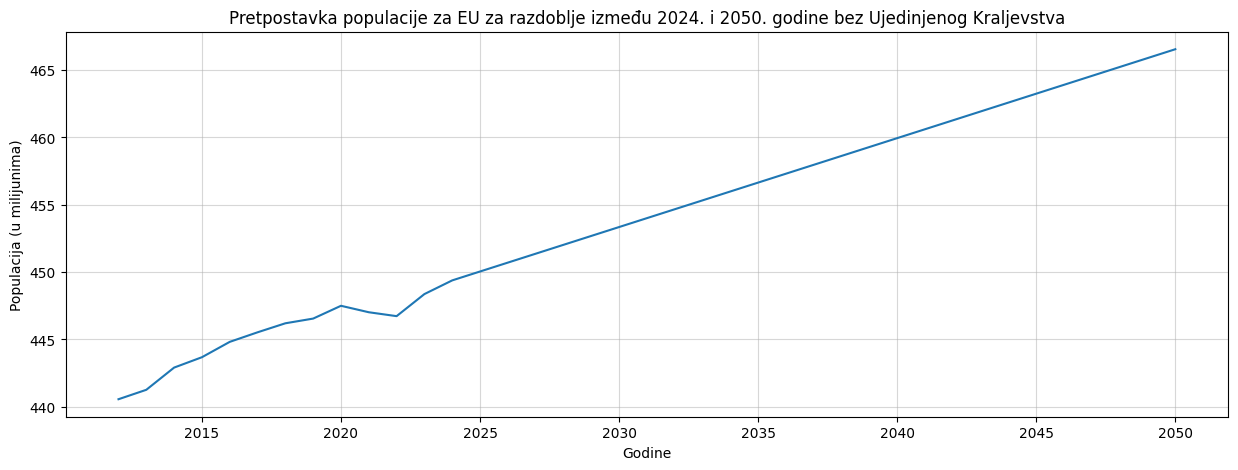

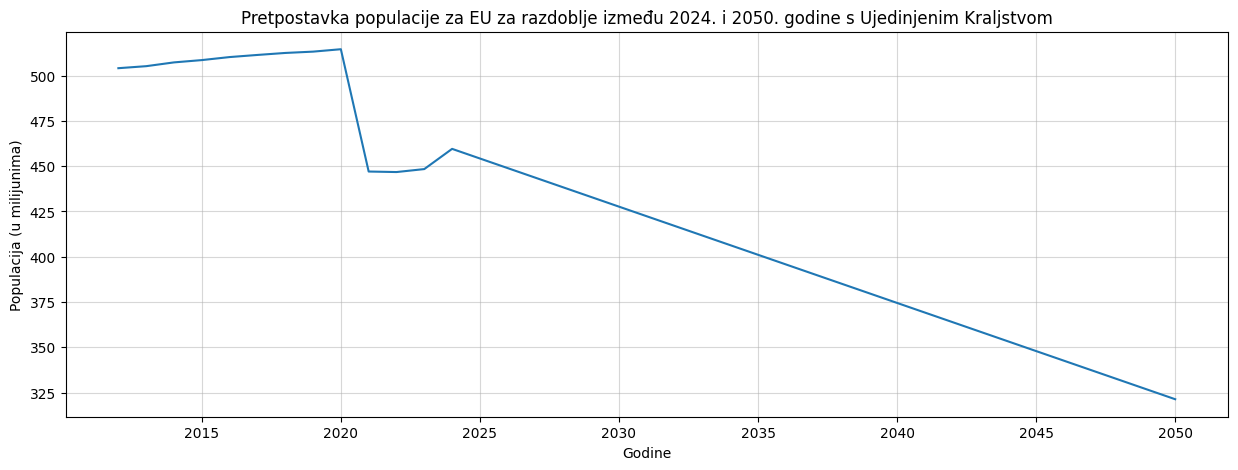

In [505]:
predikcija_eu(list(eu_populacija_brexit.values()), 'Pretpostavka populacije za EU za razdoblje između 2024. i 2050. godine bez Ujedinjenog Kraljevstva')
predikcija_eu(list(eu_populacija.values()), 'Pretpostavka populacije za EU za razdoblje između 2024. i 2050. godine s Ujedinjenim Kraljstvom')

Prethodni grafovi pokazuju važnost stavljanja podataka u kontekst. Izlazak Ujedinjenog Kraljestva iz Europske unije ne bi se trebao uzimati u obzir za izradu ovakve predikcije. Predikcija bez podataka o Ujedinjenom Kraljestvu daje ispravniju predikciju.

Kroz prethodni projekt fokusirali smo se na države članice Europske unije. Postoje podaci za preostale države.  

Prikaz podataka predikcije populacije za Tursku za razdoblje od 2024. do 2050. godine u milijunima.

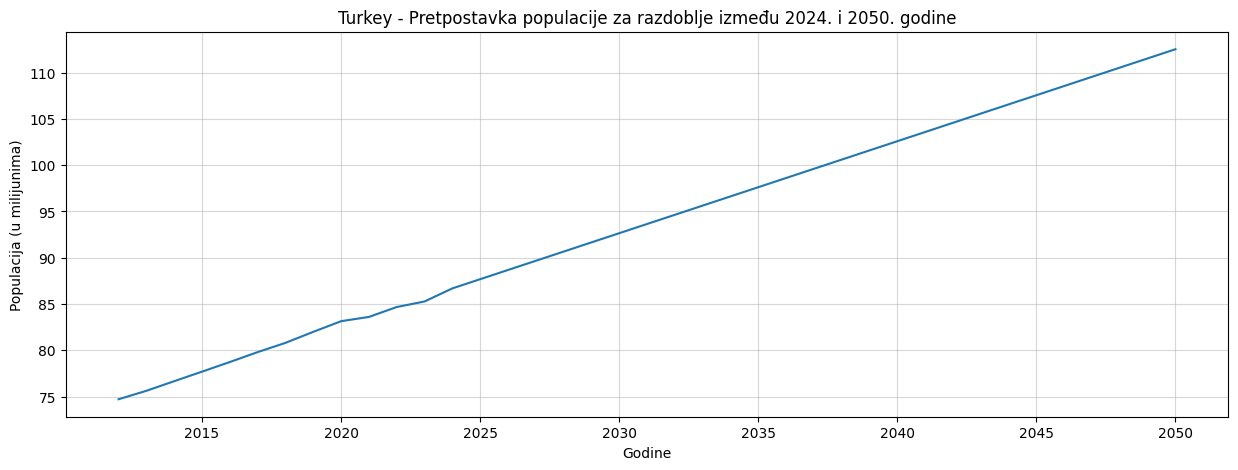

In [517]:
predikcija_drzava('TR')

Prikaz podataka predikcije populacije za Srbiju za razdoblje od 2024. do 2050. godine u milijunima.

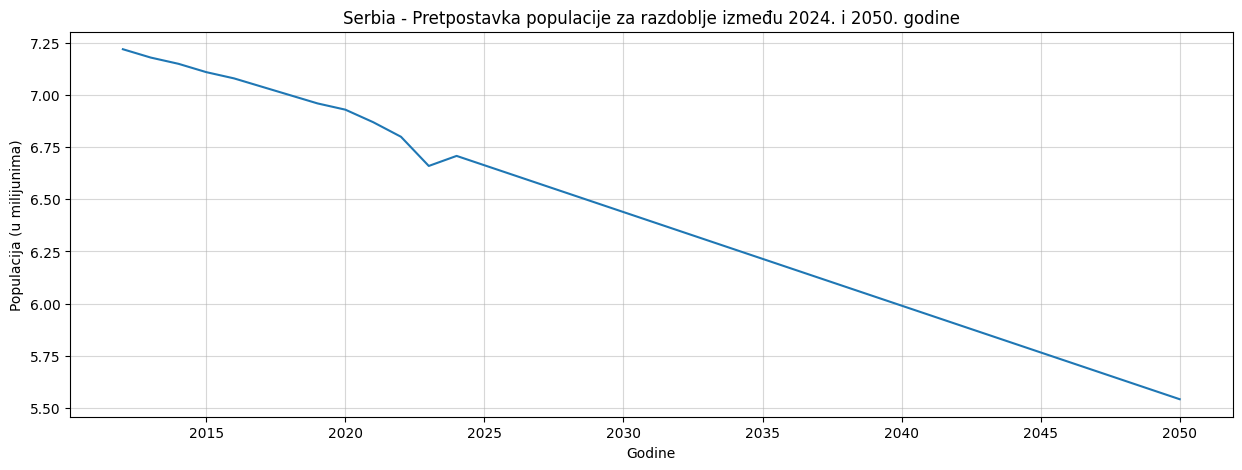

In [515]:
predikcija_drzava('RS')

Prikaz podataka predikcije populacije za Island za razdoblje od 2024. do 2050. godine u milijunima.

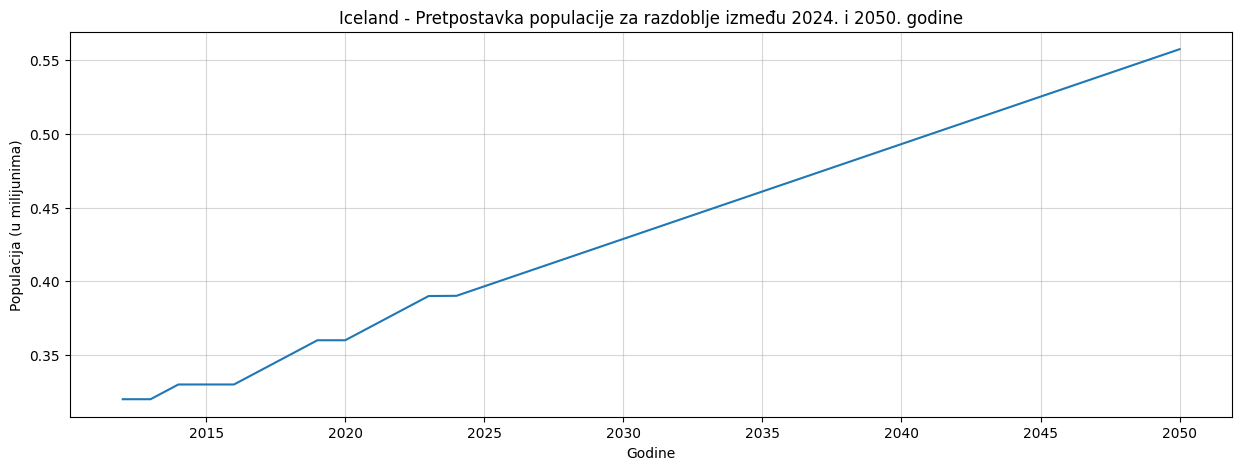

In [516]:
predikcija_drzava('IS')

Prikaz podataka predikcije populacije za Albaniju za razdoblje od 2024. do 2050. godine u milijunima.

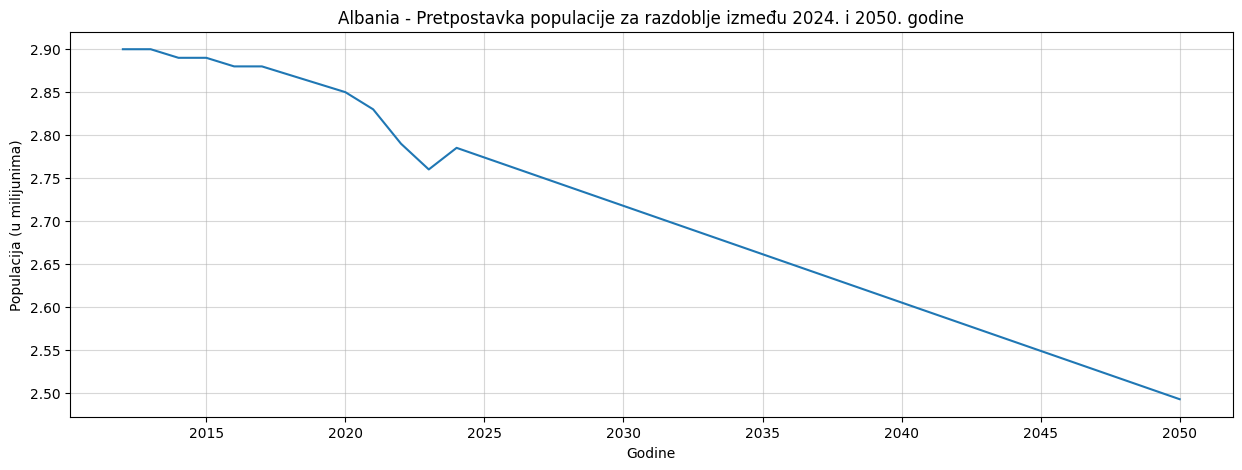

In [518]:
predikcija_drzava('AL')

Prikaz podataka predikcije populacije za Norvešku za razdoblje od 2024. do 2050. godine u milijunima.

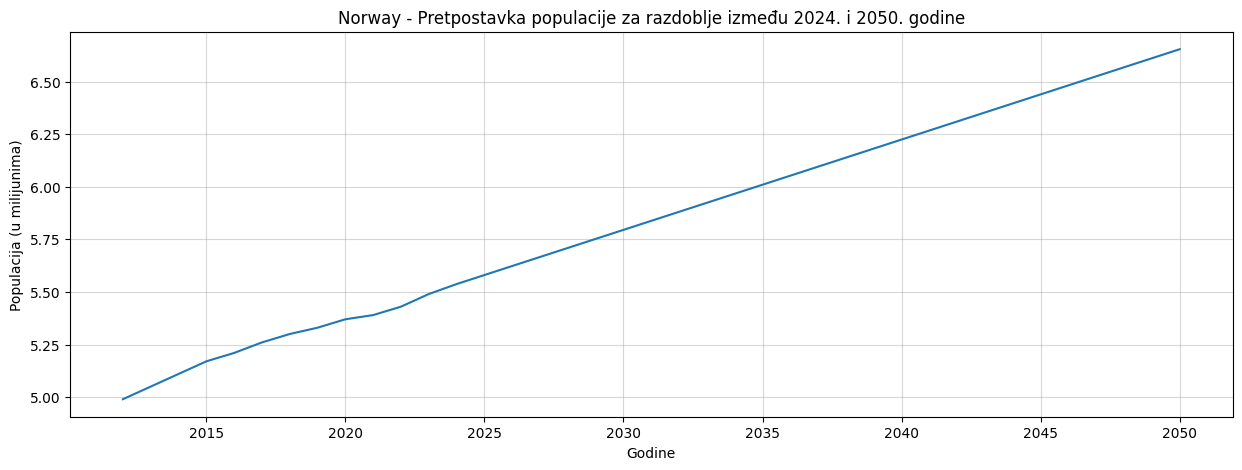

In [520]:
predikcija_drzava('NO')